In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [27]:
# load data
with open('data/dataset.json', 'r') as file:
    data = json.load(file)

# OWASP Vulnerabilities Categories

In [28]:
reports_names = list(data.keys())
reports_names

['200.19.182.102.txt',
 '200.19.182.106.txt',
 '200.19.182.110.txt',
 'memoria.ufc.br.txt',
 'sadin.ufc.br.txt',
 'sistemas.prograd.ufc.br.txt']

In [36]:
total_vulnerabilities = []
for report_name in reports_names:
    report = data[report_name]
    vulnerabilities = report['vulnerabilidades']
    for vulnerability in vulnerabilities:
        total_vulnerabilities.append(vulnerability)

In [37]:
df_vulnerability = pd.DataFrame(total_vulnerabilities)
df_vulnerability

,nome,descrição,impacto,mitigação,owasp_top_10
0,Exposição de Informações no Cabeçalho HTTP,O servidor revela informações sensíveis nos ca...,[A exposição da versão do servidor e do framew...,[Configurar o servidor para não revelar a vers...,A05:2021 - Security Misconfiguration
1,Página de Boas-Vindas Padrão do IIS,O servidor exibe a página padrão do IIS conten...,[A página de boas-vindas padrão pode ser um po...,[Remover ou personalizar completamente a págin...,A05:2021 - Security Misconfiguration
2,Ausência de Respostas para Subdomínios,O scanner DNS não encontrou subdomínios especí...,[A falta de subdomínios não expostos minimiza ...,[Garantir que as configurações de DNS sejam re...,A06:2021 - Vulnerable and Outdated Components
3,Erros Internos de Servidor e Exposição de Cabe...,"Não há evidência direta de erros, mas, caso o ...",[A exposição de mensagens de erro detalhadas p...,[Implementar um sistema de tratamento de erros...,A05:2021 - Security Misconfiguration
4,Segurança das Portas de Comunicação,O servidor tem as portas 80 (HTTP) e 443 (HTTP...,[A porta 80 (HTTP) está vulnerável a ataques d...,[Configurar o servidor para redirecionar autom...,A06:2021 - Vulnerable and Outdated Components
5,Verificação de Subdiretórios,A varredura de diretórios feita com a ferramen...,[A ausência de subdiretórios significa que não...,[Realizar verificações regulares e implementar...,A06:2021 - Vulnerable and Outdated Components
6,Exposição de Informações do Servidor (Microsof...,O servidor revela informações detalhadas sobre...,[A exposição dessas informações facilita ataqu...,[Desabilitar ou ocultar informações de versão ...,A05:2021 - Security Misconfiguration
7,Página de Boas-Vindas Padrão do IIS,O servidor está utilizando a página padrão de ...,[A página padrão pode revelar detalhes sobre a...,[Remover ou substituir a página de boas-vindas...,A05:2021 - Security Misconfiguration
8,Erro 500 no Diretório `/helpdesk`,O diretório `/helpdesk` retorna um erro 500 (I...,[Erros internos podem ser explorados para real...,[Revisar e corrigir o código e a configuração ...,A01:2021 - Broken Access Control
9,Falta de Cabeçalhos de Segurança HTTP,O servidor não está configurado para enviar ca...,[A falta desses cabeçalhos expõe o servidor a ...,[Configurar e aplicar cabeçalhos de segurança ...,A06:2021 - Vulnerable and Outdated Components


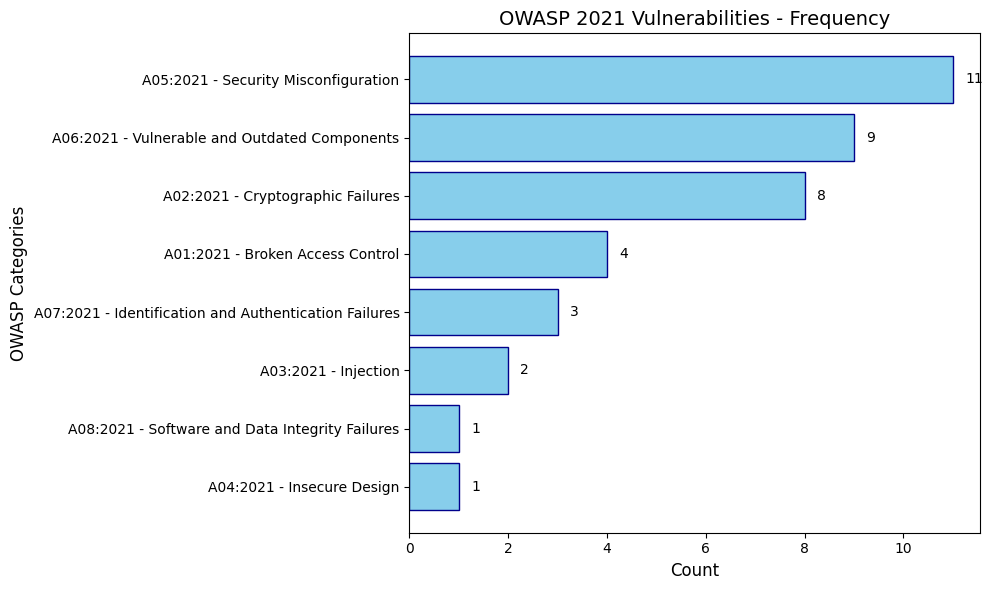

In [38]:
owasp_top_10_series = pd.Series(df_vulnerability['owasp_top_10'])
owasp_top_10_series = owasp_top_10_series.value_counts()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(owasp_top_10_series.index, owasp_top_10_series.values, color='skyblue', edgecolor='darkblue')
plt.xlabel('Count', fontsize=12)
plt.ylabel('OWASP Categories', fontsize=12)
plt.title('OWASP 2021 Vulnerabilities - Frequency', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to have highest bar on top

# Adding values to bars
for bar in bars:
    plt.text(bar.get_width() + 0.25, bar.get_y() + bar.get_height()/2, 
             str(bar.get_width()), va='center', fontsize=10)

plt.tight_layout()
plt.show()